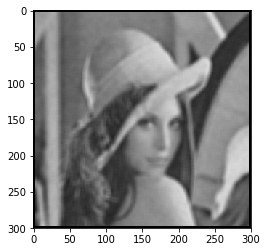

In [139]:
import numpy as np
from matplotlib import pyplot

image_rgb = pyplot.imread('Example_lena_denoise_noisy.jpg')

image = np.zeros(shape=image_rgb.shape)

mask_size = 7
mask_linear = np.ones((mask_size, mask_size)) * (1/(mask_size*mask_size))

mask = mask_linear

for x in range(mask_size//2, len(image_rgb) - mask_size//2):
    for y in range(mask_size//2, len(image_rgb[0]) - mask_size//2):
        image[x][y] = np.array([sum(sum(image_rgb[x-mask_size//2:x+mask_size//2 + 1, y-mask_size//2:y+mask_size//2+1, 0] * mask))/255, 
                                sum(sum(image_rgb[x-mask_size//2:x+mask_size//2 + 1, y-mask_size//2:y+mask_size//2+1, 1] * mask))/255, 
                                sum(sum(image_rgb[x-mask_size//2:x+mask_size//2 + 1, y-mask_size//2:y+mask_size//2+1, 2] * mask))/255, 
                               ])
        
pyplot.imsave(arr=image, fname='generated_image.jpg')
pyplot.imshow(image)

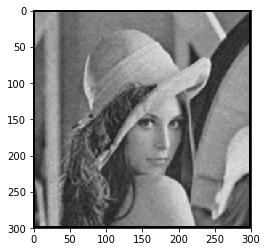

In [142]:
image_rgb = pyplot.imread('Example_lena_denoise_noisy.jpg')

mask_size = 7
sigma = 1

image = np.zeros(shape=image_rgb.shape)
mask = np.zeros(shape=(mask_size, mask_size))

# Инициализация гауссовой маски

gauss = lambda x, y: 1/(2*np.pi*sigma*sigma) * np.exp(-(x**2+y**2)/(2*sigma*sigma))

for x in range(mask_size):
    for y in range(mask_size):
        mask[x, y] = gauss(x - mask_size // 2, y - mask_size // 2)

# Применение маски к изображению
for x in range(mask_size//2, len(image_rgb) - mask_size//2):
    for y in range(mask_size//2, len(image_rgb[0]) - mask_size//2):
        image[x][y] = np.array([sum(sum(image_rgb[x-mask_size//2:x+mask_size//2 + 1, y-mask_size//2:y+mask_size//2+1, 0] * mask))/255, 
                                sum(sum(image_rgb[x-mask_size//2:x+mask_size//2 + 1, y-mask_size//2:y+mask_size//2+1, 1] * mask))/255, 
                                sum(sum(image_rgb[x-mask_size//2:x+mask_size//2 + 1, y-mask_size//2:y+mask_size//2+1, 2] * mask))/255, 
                               ])
        
pyplot.imsave(arr=image, fname='generated_image.jpg')
pyplot.imshow(image)